# **Task 4**

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [67]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
# Load the dataset
df = pd.read_csv('twitter.csv', header=None)

In [57]:
# Assign column names
df.columns = ['Tweet_ID', 'entity', 'sentiment', 'tweet_content']
df.head()

,Tweet_ID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [59]:
# Check for missing values
print(df.isnull().sum())

Tweet_ID           0
entity             0
sentiment          0
tweet_content    686
dtype: int64


In [60]:
# Drop any missing values
df.dropna(inplace=True)

In [65]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [68]:
# Function to analyze sentiment scores
def analyze_sentiment(text):
    return sid.polarity_scores(text)['compound']

In [71]:
# Apply sentiment analysis
df['Sentiment_Score'] = df['tweet_content'].apply(analyze_sentiment)

In [72]:
# Calculate average sentiment score
avg_sentiment = df['Sentiment_Score'].mean()
print(f'Average Sentiment Score: {avg_sentiment:.3f}')

Average Sentiment Score: 0.068


In [73]:
# Calculate sentiment score percentiles
percentiles = df['Sentiment_Score'].quantile([0.25, 0.5, 0.75])
print('Sentiment Score Percentiles:')
print(percentiles)

Sentiment Score Percentiles:
0.25   -0.4019
0.50    0.0000
0.75    0.5719
Name: Sentiment_Score, dtype: float64


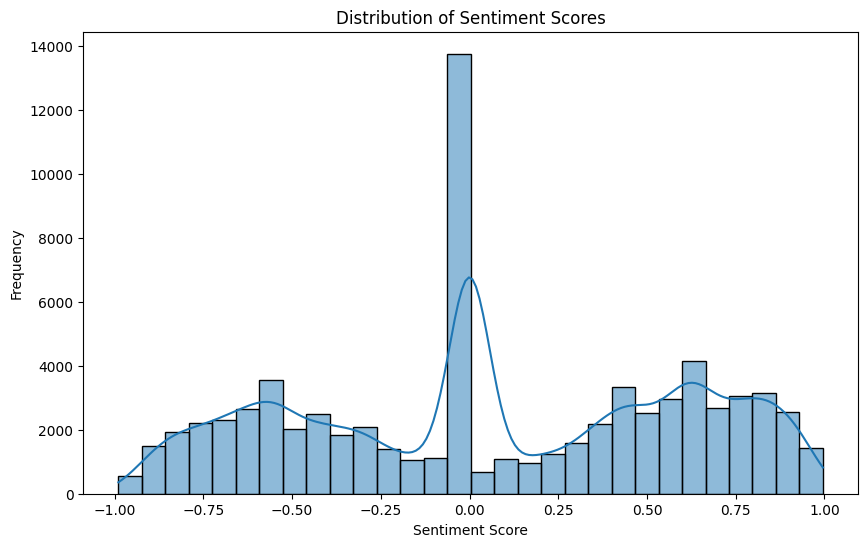

In [74]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

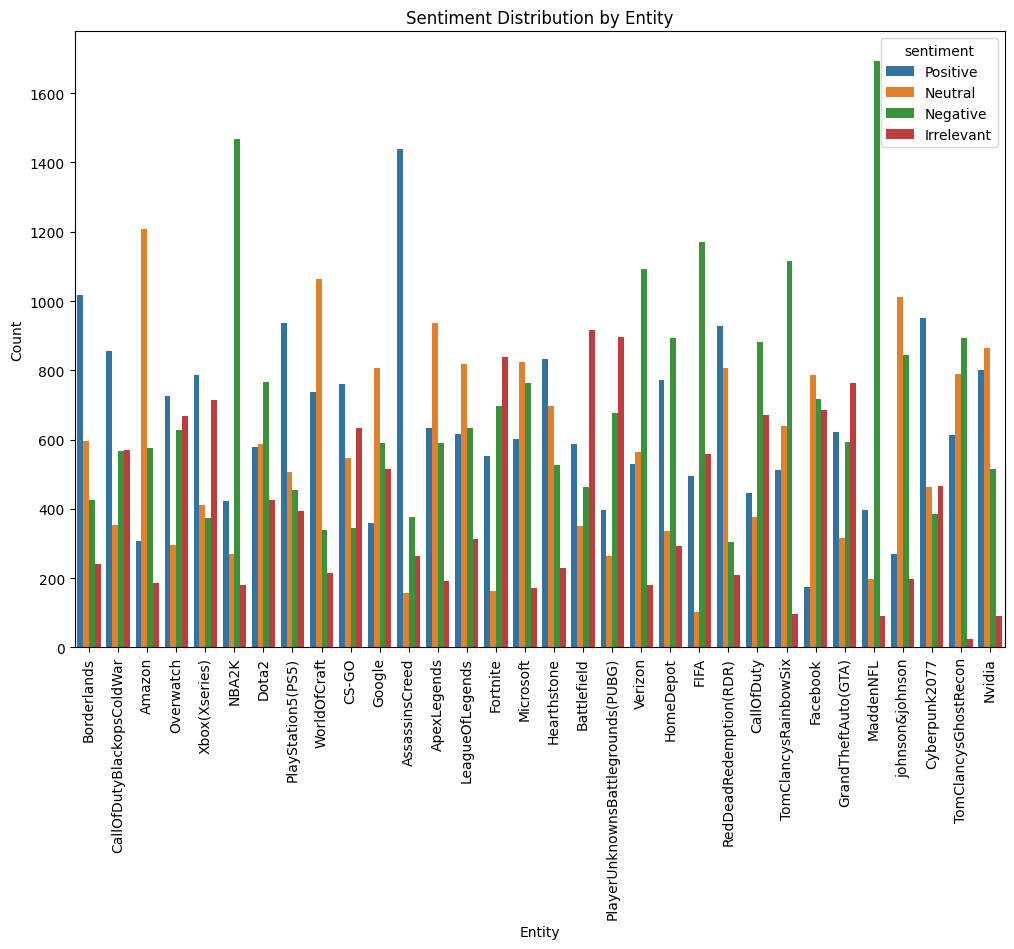

In [76]:
# Visualize sentiment by entity
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='entity', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()
